In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [2]:
#Testing a single image's shape to determine number of channels to import
import skimage as skimage
import os as os

tr_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/train_another/damage/-93.6141_30.754263.jpeg'

image_test = skimage.io.imread(tr_path)

image_test.shape

(128, 128, 3)

Training Set Import

In [5]:
#Since the channels are 3, we can use keras to import into a dataset.
tr_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/train_another/'

#Use Keras to import data
tr_dataset = keras.utils.image_dataset_from_directory(
    tr_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
tr_dataset = tr_dataset.unbatch()
tr_images = np.asarray(list(tr_dataset.map(lambda x, y: x)))
tr_labels = np.asarray(list(tr_dataset.map(lambda x, y: y)))

Found 10000 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [30]:
tr_images.shape

(10000, 128, 128, 3)

0: No Damage

1: Damage

0


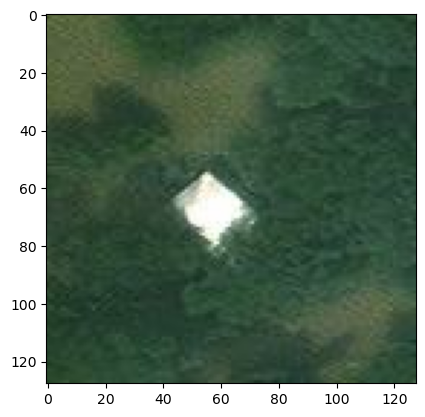

In [6]:
plt.imshow(tr_images[0].astype('uint8'))
print(tr_labels[5000])

Validation Set Import

In [7]:
#Since the channels are 3, we can use keras to import into a dataset.
val_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/validation_another/'

#Use Keras to import data
val_dataset = keras.utils.image_dataset_from_directory(
    val_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
val_dataset = val_dataset.unbatch()
val_images = np.asarray(list(val_dataset.map(lambda x, y: x)))
val_labels = np.asarray(list(val_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


Testing Set Import
There are two test sets for this data, one with imbalanced data (another_test) and one with balanced (test).

These will be kept for final testing.

In [8]:
#Since the channels are 3, we can use keras to import into a dataset.
test_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/test/'

#Use Keras to import data
test_dataset = keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
test_dataset = test_dataset.unbatch()
test_images = np.asarray(list(test_dataset.map(lambda x, y: x)))
test_labels = np.asarray(list(test_dataset.map(lambda x, y: y)))

Found 2000 files belonging to 2 classes.


In [13]:
#Since the channels are 3, we can use keras to import into a dataset.
testPlus_path = 'C:/Users/admin/OneDrive - PennO365/Desktop/650_Remote_Sensing/Data/test_another/'

#Use Keras to import data
testPlus_dataset = keras.utils.image_dataset_from_directory(
    testPlus_path,
    labels="inferred",
    label_mode="int",
    class_names= ['no_damage', 'damage'],
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
testPlus_plus_dataset = testPlus_dataset.unbatch()
testPlus_images = np.asarray(list(testPlus_dataset.map(lambda x, y: x)))
testPlus_labels = np.asarray(list(testPlus_dataset.map(lambda x, y: y)))

Found 9000 files belonging to 2 classes.


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (282,) + inhomogeneous part.

# Model 2: Transfer Learning with VGG16
Next, we will implement a transfer learning technique and apply a pre-trained model to our dataset. We are using VGG16 here. 

In [31]:
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model

# loading VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# freezin layers from pre-trained model
for layer in vgg16.layers:
    layer.trainable = False

# adding a few other layers just in case
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# creating model
model = Model(inputs=vgg16.input, outputs=predictions)

# compiling model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

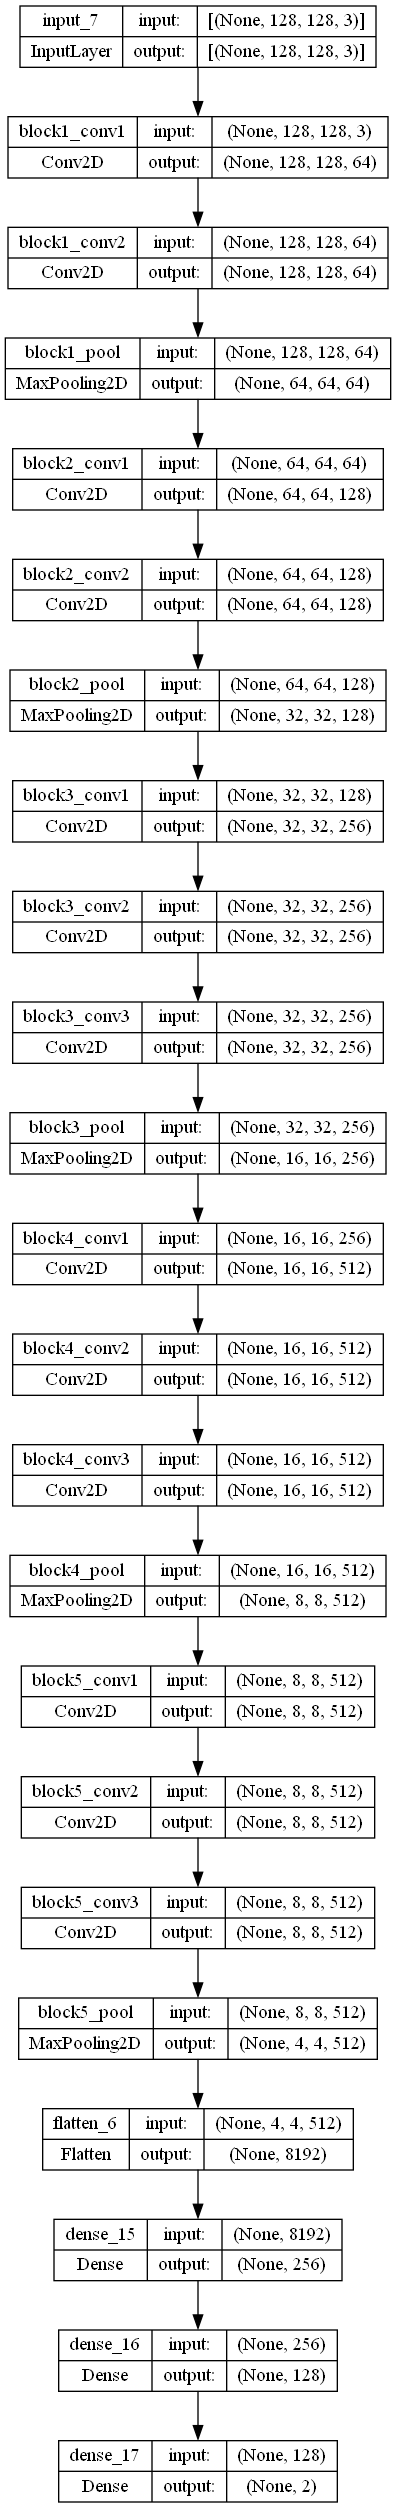

In [37]:
plot_model(model, 
    show_shapes=True, 
    show_layer_names=True
)

In [33]:
#fitting the model
history2 = model.fit(
    x_tr_train, y_tr_train,
    epochs=10, batch_size=16,
    validation_data=(x_tr_test, y_tr_test),
    verbose=1
)

Epoch 1/10
313/313 [==============================] - 300s 960ms/step - loss: 0.1158 - accuracy: 0.9688 - val_loss: 0.3172 - val_accuracy: 0.9334
Epoch 2/10
313/313 [==============================] - 343s 1s/step - loss: 0.0846 - accuracy: 0.9758 - val_loss: 0.3473 - val_accuracy: 0.9284
Epoch 3/10
313/313 [==============================] - 344s 1s/step - loss: 0.0356 - accuracy: 0.9880 - val_loss: 0.4259 - val_accuracy: 0.9238
Epoch 4/10
313/313 [==============================] - 305s 976ms/step - loss: 0.0513 - accuracy: 0.9860 - val_loss: 0.8063 - val_accuracy: 0.9048
Epoch 5/10
313/313 [==============================] - 302s 967ms/step - loss: 0.1193 - accuracy: 0.9778 - val_loss: 0.5405 - val_accuracy: 0.9268
Epoch 6/10
313/313 [==============================] - 323s 1s/step - loss: 0.0650 - accuracy: 0.9840 - val_loss: 0.4199 - val_accuracy: 0.9354
Epoch 7/10
313/313 [==============================] - 314s 1s/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.4399 - val_accurac

Test loss: 0.7397849559783936
Test accuracy: 0.9300000071525574


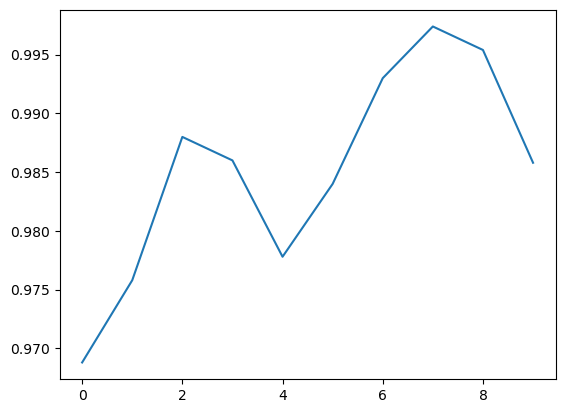

In [34]:
#plot accuracy
plt.plot(history2.history['accuracy'])

#accuracy of model
score1 = model.evaluate(x_tr_test, y_tr_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Model 2: Transfer Learning with VGG16

We also started a transfer learning approach which implements a deep learning VGG16 model. Transfer learning allows us to build high-performance models for image classification by using models that have been previously trained on large dataset. We loaded the VGG16 model via Keras and leveraged the layers from the pre-trained model. We also added additional classification layers on top of the pre-trained mode in hopes of increasing the overall accuracy. So far, this method has been very successful. It has exceptionally high accuracy while running the epochs and an overall test accuracy rate of 0.93. However, we do run the risk of overfitting this model. we will consider different ways to reduce overfitting, including adding more dropout layers or implementing a variety of transformation methods, as we work through the rest of the project.